[Median Filter] PSNR: 25.75, SSIM: 0.6101, MSE: 0.0027


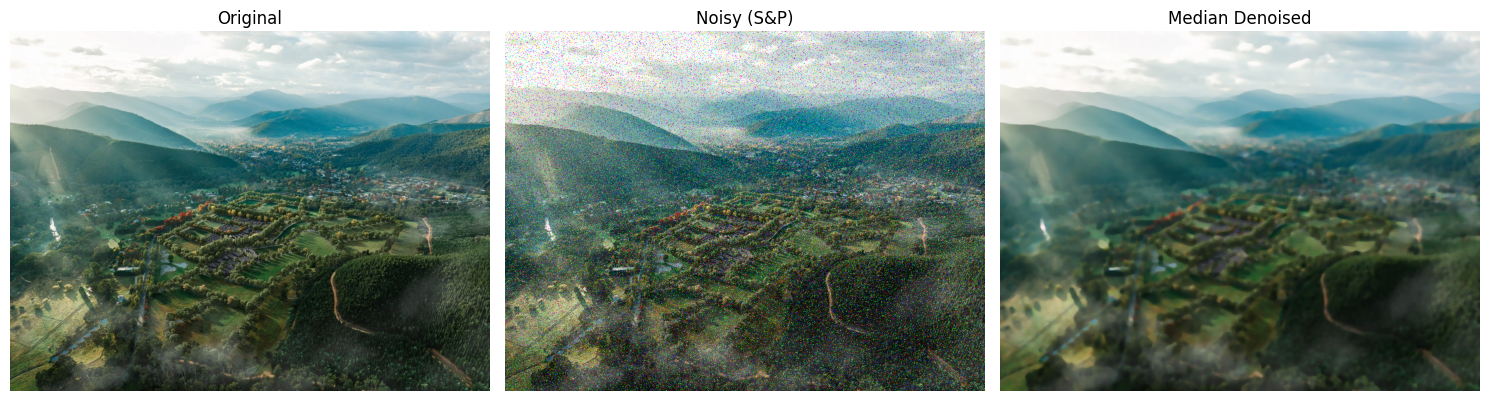

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import median
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse
from skimage.util import random_noise

# Load image and normalize
image = img_as_float(io.imread('o.jpeg'))  # Replace with your path if needed

# Add salt & pepper noise (better for median filter)
noisy_image = random_noise(image, mode='s&p', amount=0.1)

# Median filtering with larger disk size
denoised_median = np.zeros_like(noisy_image)
for i in range(noisy_image.shape[2]):
    denoised_median[..., i] = median(noisy_image[..., i], disk(5))

# Evaluation
psnr_med = psnr(image, denoised_median, data_range=1.0)
ssim_med = ssim(image, denoised_median, data_range=1.0, channel_axis=-1)
mse_med = np.mean([mse(image[..., i].flatten(), denoised_median[..., i].flatten()) for i in range(image.shape[2])])

print(f"[Median Filter] PSNR: {psnr_med:.2f}, SSIM: {ssim_med:.4f}, MSE: {mse_med:.4f}")

### --- Full Image Comparison ---
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original"); plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title("Noisy (S&P)"); plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_median)
plt.title("Median Denoised"); plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.0 MB/s eta 0:00:00


[Wavelet Denoising] PSNR: 24.15, SSIM: 0.5293, MSE: 0.0038


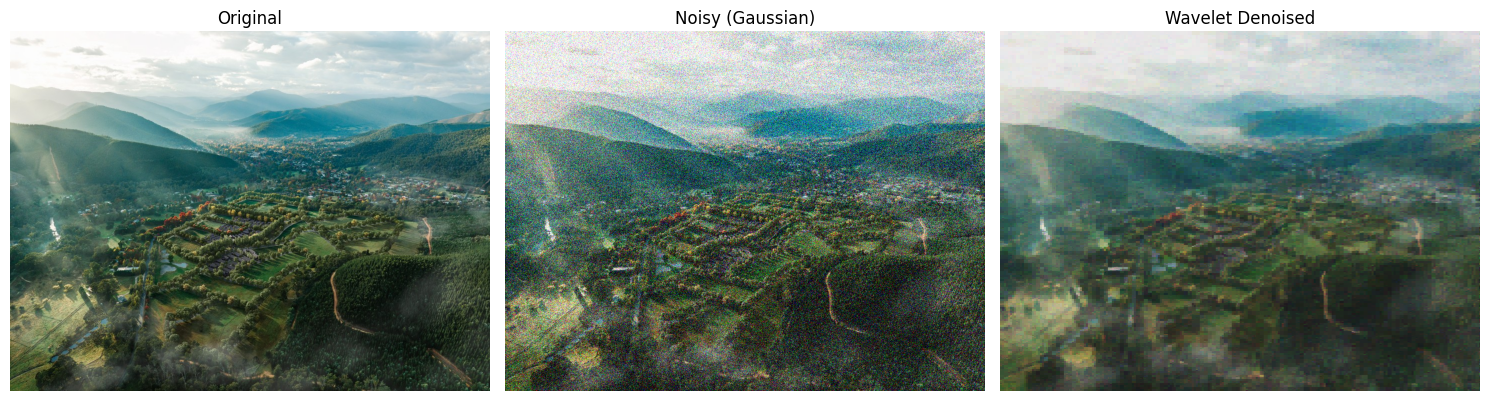

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse

# Load and normalize image
image = img_as_float(io.imread('o.jpeg'))

# Add stronger Gaussian noise
noisy_image = image + 0.2 * np.random.randn(*image.shape)  # higher noise
noisy_image = np.clip(noisy_image, 0, 1)

# Wavelet denoising (channel-wise)
denoised_wavelet = np.zeros_like(noisy_image)
for i in range(noisy_image.shape[2]):
    denoised_wavelet[..., i] = denoise_wavelet(noisy_image[..., i], method='BayesShrink', mode='soft', rescale_sigma=True)

# Evaluation metrics
psnr_wave = psnr(image, denoised_wavelet, data_range=1.0)
ssim_wave = ssim(image, denoised_wavelet, data_range=1.0, channel_axis=-1)
mse_wave = np.mean([mse(image[..., i].flatten(), denoised_wavelet[..., i].flatten()) for i in range(image.shape[2])])

# Display metrics
print(f"[Wavelet Denoising] PSNR: {psnr_wave:.2f}, SSIM: {ssim_wave:.4f}, MSE: {mse_wave:.4f}")

### --- Full Image Comparison ---
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title("Noisy (Gaussian)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_wavelet)
plt.title("Wavelet Denoised")
plt.axis('off')

plt.tight_layout()
plt.show()



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0997
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0967
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0879
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0749
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0626
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1431
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0595
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1285
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0807
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


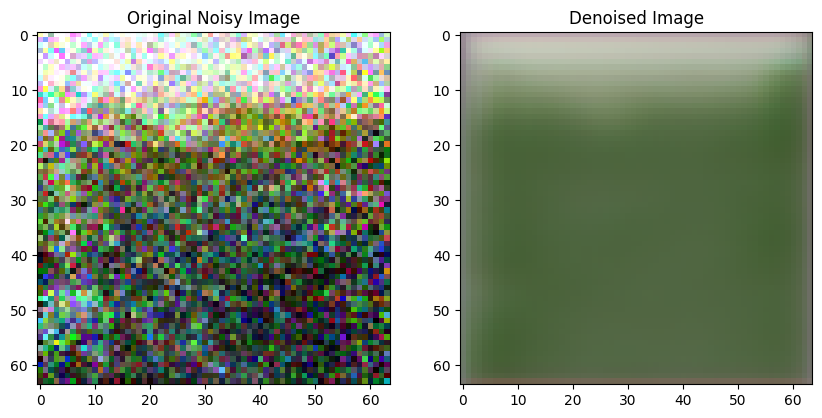

PSNR: 12.016889368520832, SSIM: 0.0376274966835621, MSE: 0.06285083663550614


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from skimage import io
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse


def add_noise(image, noise_factor=0.3):
    """Add Gaussian noise to the image."""
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

image = io.imread('o.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = np.asarray(image, dtype=np.float32) / 255.0

noisy_image = add_noise(image)


def build_n2v_model(input_shape):
    """Build a U-Net-like model for denoising."""
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


def generate_patches(image, patch_size=64, stride=32):
    """Generate patches from the image for self-supervised learning."""
    patches = []
    for i in range(0, image.shape[0] - patch_size + 1, stride):
        for j in range(0, image.shape[1] - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            mask = np.ones_like(patch)
            mask[patch_size//2, patch_size//2] = 0
            patches.append((patch, mask))
    return patches

noisy_image_resized = cv2.resize(noisy_image, (64, 64))
patches = generate_patches(noisy_image_resized)
X_train = np.array([patch[0] for patch in patches])
y_train = np.array([patch[0] * patch[1] for patch in patches])


model = build_n2v_model((64, 64, 3))

model.fit(X_train, y_train, epochs=10, batch_size=8)


denoised_image = model.predict(np.expand_dims(noisy_image_resized, axis=0))[0]


psnr_value = psnr(noisy_image_resized, denoised_image, data_range=1.0)

ssim_value = ssim(noisy_image_resized, denoised_image, multichannel=True, win_size=3, channel_axis=-1, data_range=1.0)

mse_value = np.mean([mse(noisy_image_resized[..., i].flatten(), denoised_image[..., i].flatten()) for i in range(noisy_image_resized.shape[2])])


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Noisy Image")
plt.imshow(noisy_image_resized)
plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image)
plt.show()

print(f"PSNR: {psnr_value}, SSIM: {ssim_value}, MSE: {mse_value}")


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

video_path = "1.mp4"
output_folder = "extracted_frames"
processed_folder = "processed_frames"
collage_path = "collage.jpg"
frame_size = (256, 256)

os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames in input video: {frame_count}")

frame_list = []
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_resized = cv2.resize(frame, frame_size)
    cv2.imwrite(f"{output_folder}/frame_{i:03d}.jpg", frame_resized)
    frame_list.append(frame_resized)
    i += 1
cap.release()
print(f" Extracted {len(frame_list)} frames")

os.makedirs(processed_folder, exist_ok=True)

combined_frame_size = (frame_size[0] * 4, frame_size[1])
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 20
video_out = cv2.VideoWriter("processed_video_combined.avi", fourcc, fps, combined_frame_size, isColor=True)

for idx, frame in tqdm(enumerate(frame_list), total=len(frame_list), desc="Processing Frames"):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(gray, 100, 200)
    bitwise_not = cv2.bitwise_not(threshold)

    threshold_bgr = cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR)
    blurred_bgr = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
    canny_bgr = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    bitwise_bgr = cv2.cvtColor(bitwise_not, cv2.COLOR_GRAY2BGR)

    combined = np.hstack((threshold_bgr, blurred_bgr, canny_bgr, bitwise_bgr))

    cv2.imwrite(f"{processed_folder}/combined_{idx:03d}.jpg", combined)
    video_out.write(combined)

video_out.release()
print(" Final combined video saved: processed_video_combined.avi")

collage_rows = 5
collage_cols = 5
collage = []

for r in range(collage_rows):
    row = []
    for c in range(collage_cols):
        idx = r * collage_cols + c
        if idx < len(frame_list):
            row.append(frame_list[idx])
    if row:
        collage.append(np.hstack(row))

final_collage = np.vstack(collage)
cv2.imwrite(collage_path, final_collage)
print(f"🖼 Collage saved: {collage_path}")


Total frames in input video: 260
 Extracted 260 frames


Processing Frames: 100%|██████████| 260/260 [00:01<00:00, 197.49it/s]


 Final combined video saved: processed_video_combined.avi
🖼 Collage saved: collage.jpg


In [ ]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d69df8960c3b7c802680d2a2529001023ec35183001ba8a4c6ad22cce8a0bf57
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import os

dataset_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101.rar'
dataset_dir = '/content/UCF-101'

os.makedirs(dataset_dir, exist_ok=True)
!curl --insecure -o /content/UCF-101/UCF101.rar 'https://www.crcv.ucf.edu/data/UCF101/UCF101.rar'

!apt-get install unrar
!unrar x /content/UCF-101/UCF101.rar /content/UCF-101/

Streaming output truncated to the last 5000 lines.
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c05.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c06.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c07.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c01.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c02.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c03.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c04.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c05.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c06.avi      62%  OK 
Extracting  /content/UCF-101/UC

In [ ]:
import shutil
import random

SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10
DEST_DIR = '/content/UCF101_subset'

os.makedirs(DEST_DIR, exist_ok=True)

for cls in SELECTED_CLASSES:
    class_path = os.path.join('/content/UCF-101/UCF-101', cls)
    dest_class_path = os.path.join(DEST_DIR, cls)
    os.makedirs(dest_class_path, exist_ok=True)

    selected = random.sample(os.listdir(class_path), VIDEOS_PER_CLASS)
    for video in selected:
        shutil.copy(os.path.join(class_path, video), dest_class_path)



In [ ]:
!pip install tensorflow


In [ ]:
# Step 4: Preprocess Videos (Extract Frames, Resize)
import cv2
import numpy as np

def extract_frames(video_path, frame_interval=5, frame_size=(224, 224), max_frames=16):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_interval == 0:
            frame = cv2.resize(frame, frame_size)
            frames.append(frame)
        frame_count += 1
        if len(frames) == max_frames:
            break
    cap.release()
    return np.array(frames)

# Example usage: Extract frames from a sample video in the subset
video_path = '/content/UCF-101/UCF-101/Basketball/v_Basketball_g01_c01.avi'  # Adjust path as needed
frames = extract_frames(video_path)
print(f"Extracted frames shape: {frames.shape}")

# Step 5: Load and Preprocess the Dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_dataset(DEST_DIR, selected_classes, frame_size=(224, 224), max_frames=16):
    X = []
    y = []
    class_labels = {cls: idx for idx, cls in enumerate(selected_classes)}

    for cls in selected_classes:
        class_path = os.path.join(DEST_DIR, cls)
        for video_file in os.listdir(class_path):
            video_path = os.path.join(class_path, video_file)
            frames = extract_frames(video_path, frame_size=frame_size, max_frames=max_frames)
            if frames.shape[0] == max_frames:
                X.append(frames)
                y.append(class_labels[cls])

    X = np.array(X)
    y = np.array(y)
    y = to_categorical(y, num_classes=len(selected_classes))
    return X, y

X, y = load_dataset(DEST_DIR, SELECTED_CLASSES)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Extracted frames shape: (16, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_video_frames(frames):
    augmented_frames = []
    for frame in frames:
        augmented_frame = datagen.random_transform(frame)
        augmented_frames.append(augmented_frame)
    return np.array(augmented_frames)

X_train_augmented = np.array([augment_video_frames(video) for video in X_train])

def build_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='SAME', input_shape=input_shape, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='SAME', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Conv3D(256, (3, 3, 3), activation='relu', padding='SAME', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_shape = (16, 224, 224, 3)
model = build_cnn_lstm_model(input_shape, 5)
model.summary()

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    X_train_augmented, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[checkpoint]
)

print("\nLoading best model based on validation accuracy...")
best_model = load_model('best_model.h5')
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy on Test Set: {acc*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_21 (Conv3D)              │ (None, 16, 224, 224,   │         5,248 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 224, 224,   │           256 │
│ (BatchNormalization)            │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_21 (MaxPooling3D) │ (None, 8, 112, 112,    │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_22 (Conv3D)              │ (None, 8, 112, 112,    │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 112, 112,    │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_22 (MaxPooling3D) │ (None, 4, 56, 56, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_23 (Conv3D)              │ (None, 4, 56, 56, 256) │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 4, 56, 56, 256) │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_23 (MaxPooling3D) │ (None, 2, 28, 28, 256) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │   205,521,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,637,317 (788.26 MB)

 Trainable params: 206,636,421 (788.26 MB)

 Non-trainable params: 896 (3.50 KB)

Class weights: {0: np.float64(1.0857142857142856), 1: np.float64(0.8444444444444444), 2: np.float64(1.52), 3: np.float64(0.8444444444444444), 4: np.float64(0.95)}
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.2897 - loss: 54.8194
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 967ms/step - accuracy: 0.2849 - loss: 55.8420 - val_accuracy: 0.5000 - val_loss: 106.9438
Epoch 2/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4808 - loss: 71.5898
Epoch 2: val_accuracy did not improve from 0.50000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4939 - loss: 68.6762 - val_accuracy: 0.2000 - val_loss: 108.9131
Epoch 3/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5378 - loss: 59.8520
Epoch 3: val_accuracy did not improve from 0.50000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5405 - loss: 58.5651 - val_accuracy: 0.5000 - val_loss: 91.2605
Epoch 4/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6503 - loss: 24.4378
Epoch 4: val_accuracy did not improve from 0.50000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6756 - loss: 23.6976 - val_accuracy: 0.5000 - val_loss: 88.5029
Epoch 5/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9580 - loss: 15.5263
Epoch 5: val_accuracy i

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9369 - loss: 16.8690 - val_accuracy: 0.6000 - val_loss: 63.8258
Epoch 6/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8663 - loss: 20.7324
Epoch 6: val_accuracy did not improve from 0.60000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8714 - loss: 21.3351 - val_accuracy: 0.3000 - val_loss: 78.4032
Epoch 7/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8500 - loss: 19.2938
Epoch 7: val_accuracy did not improve from 0.60000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8582 - loss: 19.2699 - val_accuracy: 0.3000 - val_loss: 75.5793
Epoch 8/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8607 - loss: 14.3154
Epoch 8: val_accuracy did not improve from 0.60000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8669 - loss: 14.1398 - val_accuracy: 0.1000 - val_loss: 90.4256
Epoch 9/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9487 - loss: 19.9247
Epoch 9: val_accuracy did no

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 63.8258
Best Model Accuracy on Test Set: 60.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Best Model Accuracy on Test Set: 60.00%
Confusion Matrix:
[[0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 5 0 0]
 [0 0 1 0 0]
 [0 0 1 0 1]]
Classification Report:
               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         1
       Biking       0.00      0.00      0.00         1
PlayingGuitar       0.62      1.00      0.77         5
       Typing       0.00      0.00      0.00         1
     JumpRope       0.50      0.50      0.50         2

     accuracy                           0.60        10
    macro avg       0.23      0.30      0.25        10
 weighted avg       0.41      0.60      0.48        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


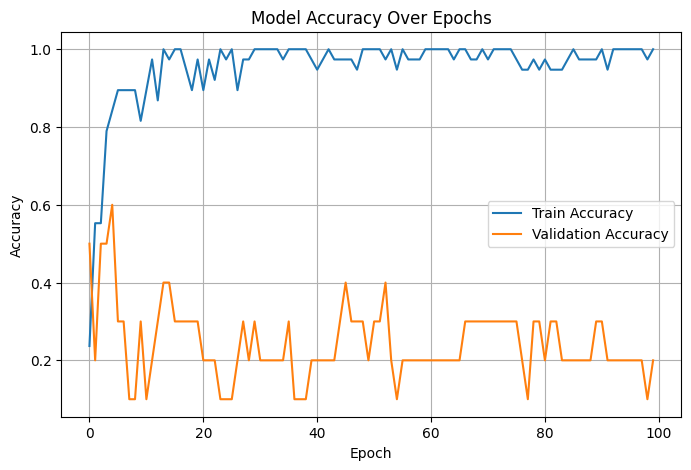

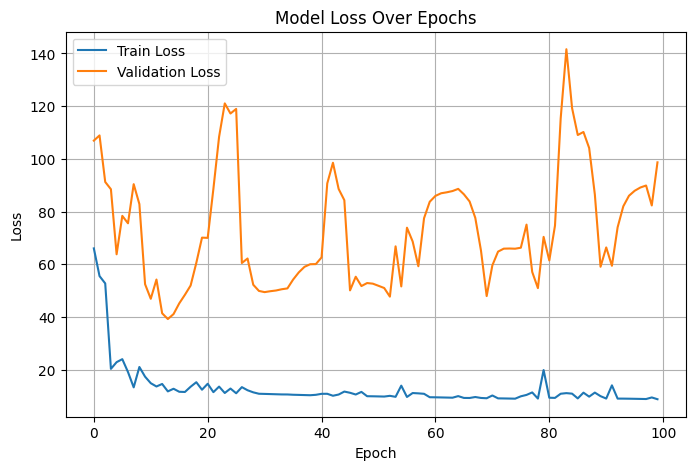

In [ ]:
# Step 9: Evaluate the Best Saved Model
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Predict and evaluate accuracy
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Best Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=SELECTED_CLASSES)
print(f"Classification Report:\n{report}")

# Step 10: Visualize the Results from Training History
# NOTE: Assumes `history` is available from training step

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
